In [112]:
# [IMPORT]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [113]:
# [LOAD DATASET]
dataset = load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
X = df.drop(columns=['target'])
y = df['target']

In [114]:
# [EXPLORATORY DATA ANALYSIS]
print(f"Feature Name/s:\n{dataset.feature_names}")
print(f"Target Name/s\n{dataset.target_names}")
print(df.shape)
# print(df.describe())

# check for class imbalance (No Class Imbalance)
print(f"{y.value_counts(normalize=True) * 100}")

# check for feature's linear relationship
# for col in X.columns:
#     sns.scatterplot(x=X[col], y=y)
#     plt.show()

Feature Name/s:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Name/s
['class_0' 'class_1' 'class_2']
(178, 14)
target
1    39.887640
0    33.146067
2    26.966292
Name: proportion, dtype: float64


In [115]:
# [DATA PREPROCESSING]

In [116]:
# [DATA SPLIT]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# [MODEL SELECTION]
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000))
])

In [118]:
# [HYPERPARAMETER TUNING]
# print(pipe.named_steps['model'].get_params(), sep='\n')
param_grid = {
    'model__C': [0.01, 0.1, 1, 10], # underfitting vs. overfitting
    'model__penalty': ['l2'], # type of regulatization
    'model__solver': ['lbfgs', 'newton-cg'], # optimization algorithm used to fit
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

# extract best model
best_model = grid.best_estimator_

# make predictions
y_pred = best_model.predict(X_test)

Best parameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best cross-validated accuracy: 0.9928571428571429


Test set accuracy: 1.0


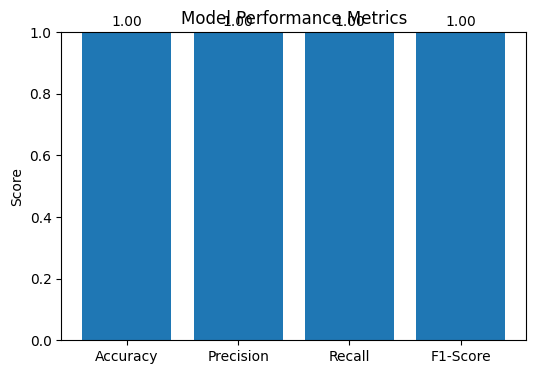

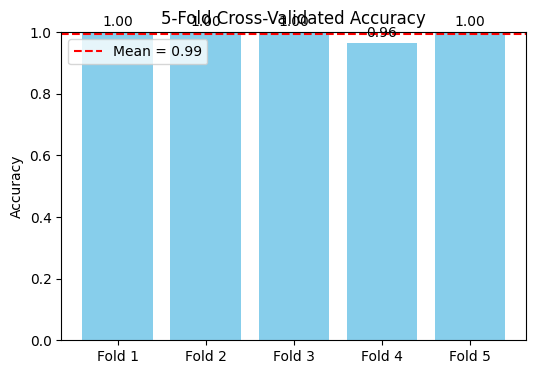

In [119]:
# [MODEL EVALUATION]
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average="macro"),
    "Recall": recall_score(y_test, y_pred, average="macro"),
    "F1-Score": f1_score(y_test, y_pred, average="macro")
}


cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

plt.figure(figsize=(6,4))
bars = plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10)
    
plt.show()

# Plot CV scores
plt.figure(figsize=(6,4))
folds = [f"Fold {i+1}" for i in range(len(cv_scores))]
plt.bar(folds, cv_scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validated Accuracy")

# Add value labels on top
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# Plot mean line
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f"Mean = {cv_scores.mean():.2f}")
plt.legend()
plt.show()

In [120]:
joblib.dump(best_model, 'models/logreg_wine.joblib')

['models/logreg_wine.joblib']